In [8]:
import glob
import matplotlib.pyplot as plt
# you will need xarray and nedCDF4
import xarray as xr

# Gas-phase separated Metallicity Projection Maps
At every cell, we assign gas phase using its temperature and hydrogen abundance. Please see Table 3 in [Kim et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023ApJ...946....3K) for actual threshold we use. For simplicity, I only use 5 phases such that `CU` stands for `CMM`+`CNM`+`UNM`+`UIM` and `WIM` denotes `WPIM`+`WCIM`. I then create two projection maps:

EM-weighted projection:
$$Z_{\rm EM}(x,y) = \int n_e^2 Z \Theta({\rm ph}) dz / \int n_e^2 \Theta({\rm ph})dz$$

density-weighted projection:
$$Z_{\rho}(x,y) = \int \rho Z \Theta({\rm ph}) dz / \int \rho\Theta({\rm ph}) dz$$

with a phase selection function $\Theta({\rm ph})=1$ for a given phase and $0$ otherwise. The data is stored in units of solar metallicity which is assumed to $Z_\odot=0.02$.

# Example Simulation data
The particular simulation shown in this example is from `R8-b10-Z1.0` presented in [Kim et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024ApJ...972...67K). For more information, please read the two papers cited here.

In [2]:
file_path = sorted(glob.glob("../example_data/*.nc"))

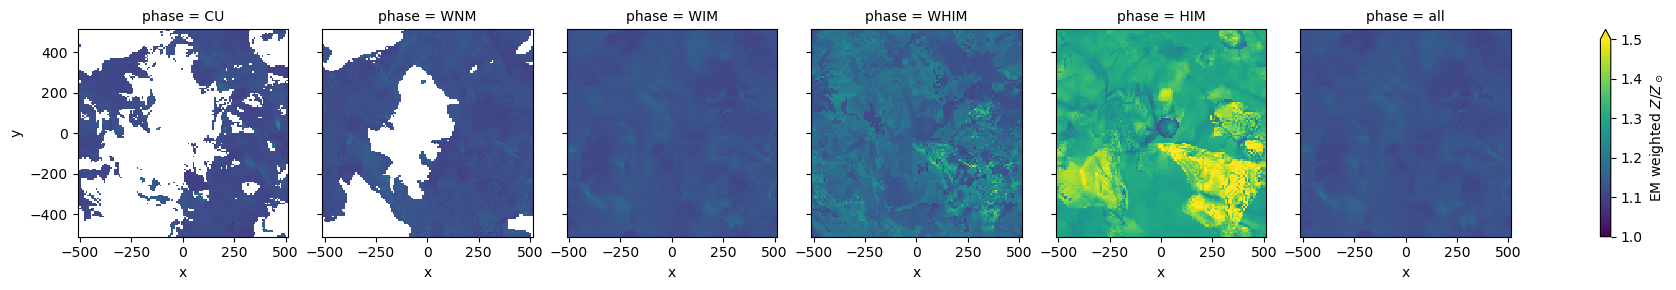

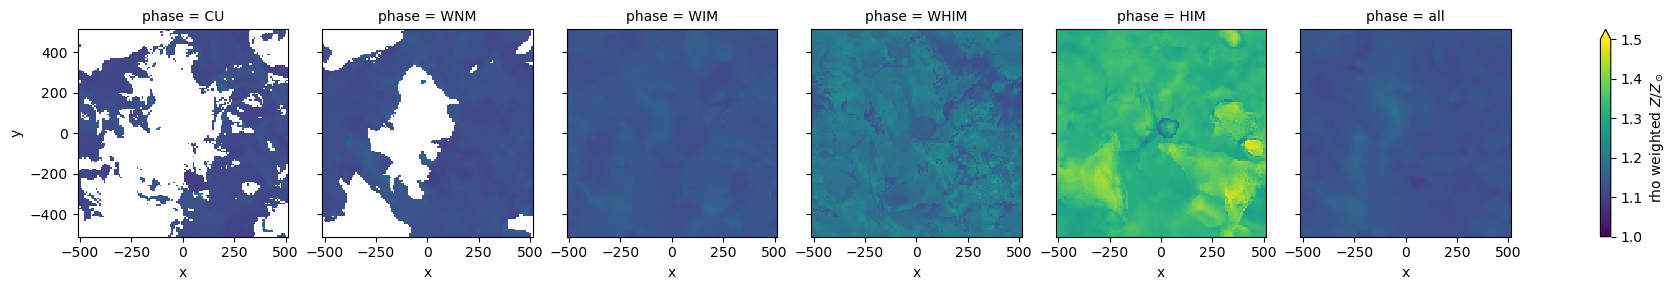

In [11]:
with xr.open_dataset(file_path[1]) as dset:
    # emission measure weighted metallicity projection
    for wfield in dset:
        dset[wfield].plot(col="phase",vmin=1,vmax=1.5,
                          cbar_kwargs=dict(label=f"{wfield}-weighted $Z/Z_\odot$"))

# Time series

For this example, I only use the snapshot numbers of 250-950 with an interval of 50. Note that the snapshot number corresponds to the code time, which is nearly Myr (code time unit is pc/(km/s)). Full data with an interval of 1 is avaliable.  

In [4]:
dset_list = []
for f in file_path:
    with xr.open_dataset(f) as dset:
        dset_list.append(dset)
dset = xr.concat(dset_list, dim="time")

/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, '$\\rho$ weighted metallicity fluctuation')

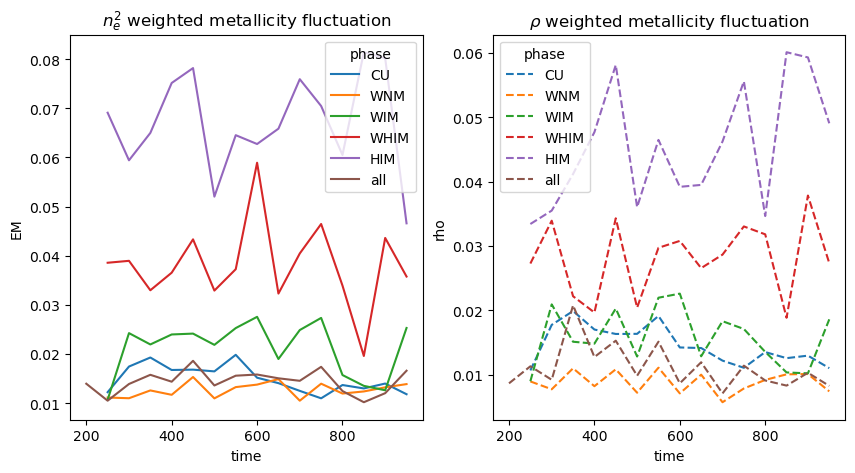

In [10]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

plt.sca(axes[0])
dset["EM"].std(dim=["x","y"]).plot(hue="phase")
plt.title(r"$n_e^2$-weighted metallicity fluctuation")

plt.sca(axes[1])
dset["rho"].std(dim=["x","y"]).plot(hue="phase",ls="--")
plt.title(r"$\rho$-weighted metallicity fluctuation")